In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import matplotlib.gridspec as gridspec
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from keras.utils import to_categorical
from tensorflow.keras import layers, models

In [275]:
data = pd.read_csv('dataset/A_Z Handwritten Data.csv').astype('float32')

In [276]:
data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [277]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [278]:
data.describe(include='all')

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [279]:
data.shape

(372450, 785)

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [281]:
X = data.drop('0',axis = 1)
y = data['0']

In [282]:
X.head()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [283]:
y.value_counts()

0
14.0    57825
18.0    48419
20.0    29008
2.0     23409
19.0    22495
15.0    19341
13.0    19010
0.0     13869
12.0    12336
11.0    11586
17.0    11566
4.0     11440
24.0    10859
22.0    10784
3.0     10134
1.0      8668
9.0      8493
7.0      7218
23.0     6272
25.0     6076
16.0     5812
6.0      5762
10.0     5603
21.0     4182
5.0      1163
8.0      1120
Name: count, dtype: int64

In [284]:
X = X / 255.0

In [285]:
letters = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

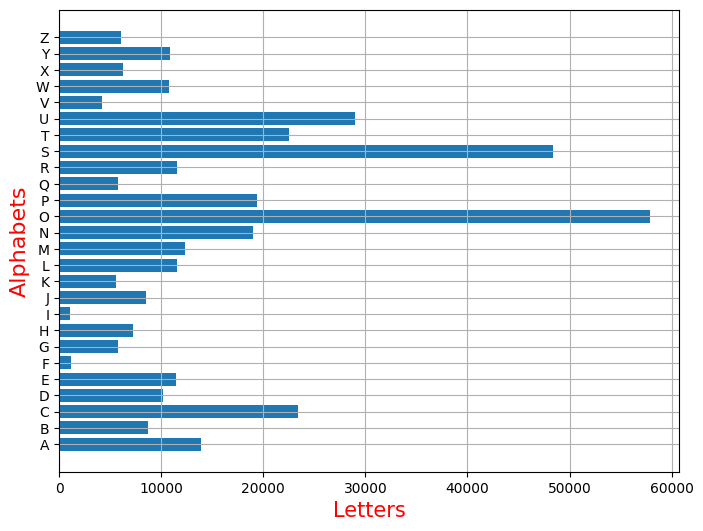

In [286]:
y_integer = np.intp(y)
count = np.zeros(26, dtype='int')

for i in y_integer:
    count[i] += 1

alphabets = []

for i in letters.values():
    alphabets.append(i)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.barh(alphabets, count)

plt.xlabel('Letters', fontsize=15, color='red')
plt.ylabel('Alphabets', fontsize=16, color='red')
plt.grid()

plt.rcParams['font.family'] = 'sans-serif'

plt.show()

In [287]:
type(X)

pandas.core.frame.DataFrame

In [288]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

x_train = np.reshape(x_train.values, (x_train.shape[0], 28,28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28,28))

print("Shape of Training data: ", x_train.shape)
print("Shape of Testing data: ", x_test.shape)

Shape of Training data:  (297960, 28, 28)
Shape of Testing data:  (74490, 28, 28)


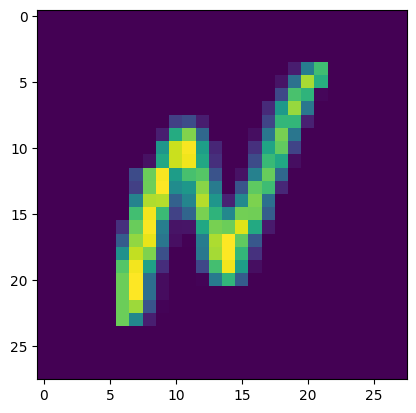

In [292]:
plt.imshow(x_train[10])
plt.show()

In [290]:
np.max(x_test)

1.0

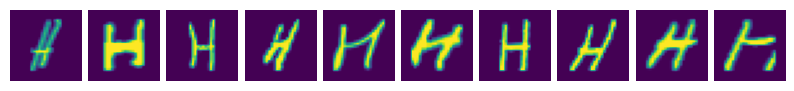

In [293]:
specific_label = 7
indices = np.where(y_train == specific_label)[0]

fig = plt.figure(figsize=(10, 1))  
gs = gridspec.GridSpec(1, 10, wspace=0.1, hspace=0.1)  

k = 0
for i in range(1):
    for j in range(10):
        if k < len(indices):
            ax = fig.add_subplot(gs[i, j])
            ax.imshow(x_train[indices[k]].reshape(28, 28))
            ax.axis('off')  
            k += 1

plt.show()

In [294]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

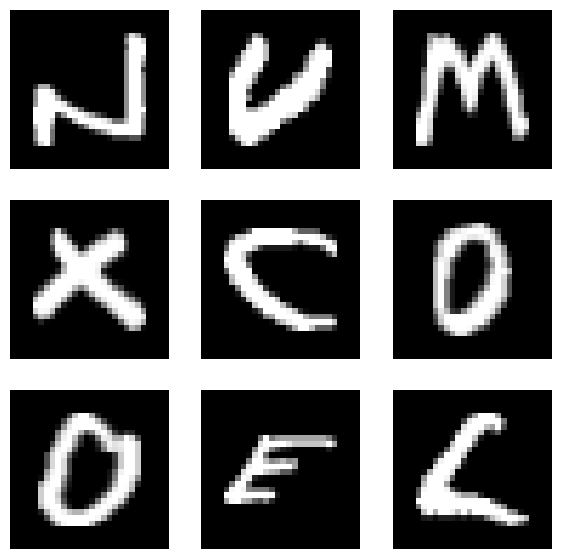

In [295]:
shuffle_data = shuffle(x_train)

fig, axes = plt.subplots(3, 3, figsize=(7, 7))
axes = axes.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuffle_data[i], (28, 28)), cmap="gray") 
    axes[i].axis('off') 

plt.show()

In [296]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)

print("New shape of training data: ", x_train.shape)
print("New shape of testing data: ", x_test.shape)

New shape of training data:  (297960, 28, 28, 1)
New shape of testing data:  (74490, 28, 28, 1)


In [297]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [298]:
y_training = to_categorical(y_train, num_classes=26)
y_testing = to_categorical(y_test, num_classes=26)

print("New shape of training labels: ", y_training.shape)
print("New shape of testing labels: ", y_testing.shape)

New shape of training labels:  (297960, 26)
New shape of testing labels:  (74490, 26)


In [299]:
y_training[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [300]:
datagen = ImageDataGenerator(
    rotation_range=15,  
    width_shift_range=0.15, 
    height_shift_range=0.15, 
    zoom_range=0.15, 
    shear_range=0.15,  
    horizontal_flip=True,
    vertical_flip=False 
)

In [301]:
augmented_data = []
augmented_labels = []

for x_batch, y_batch in datagen.flow(x_train, y_training, batch_size=32):
    augmented_data.extend(x_batch)
    augmented_labels.extend(y_batch)
    if len(augmented_data) >= len(x_train):
        break

augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)

In [3]:
augmented_model = Sequential()

input_shape=(28, 28, 1)

augmented_model.add(Conv2D(64, (3, 3), activation='relu' ))
augmented_model.add(MaxPool2D(2, 2))

augmented_model.add(Conv2D(64, (3, 3), activation='relu'))
augmented_model.add(MaxPool2D(2, 2))

augmented_model.add(Conv2D(64, (3, 3), activation='relu'))
augmented_model.add(MaxPool2D(2, 2))

augmented_model.add(Flatten())

augmented_model.add(Dropout(0.25))

augmented_model.add(Dense(128, activation="relu"))
augmented_model.add(Dense(256, activation="relu"))

augmented_model.add(Dense(26, activation="softmax"))


In [303]:
augmented_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 26)             │         6,682 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,522 (478.60 KB)

 Trainable params: 122,522 (478.60 KB)

 Non-trainable params: 0 (0.00 B)

In [304]:
augmented_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [305]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model/w_best_ever.keras', monitor='val_loss', save_best_only=True)

In [306]:
augmented_model.fit(augmented_data, augmented_labels, batch_size=32, epochs=25, 
                    validation_data=(x_test, y_testing), callbacks=[early_stopping, model_checkpoint])

Epoch 1/25
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 109s 11ms/step - accuracy: 0.6140 - loss: 1.2673 - val_accuracy: 0.9178 - val_loss: 0.2770
Epoch 2/25
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 111s 12ms/step - accuracy: 0.8135 - loss: 0.5995 - val_accuracy: 0.9358 - val_loss: 0.2147
Epoch 3/25
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 114s 12ms/step - accuracy: 0.8407 - loss: 0.5158 - val_accuracy: 0.9410 - val_loss: 0.2062
Epoch 4/25
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 104s 11ms/step - accuracy: 0.8533 - loss: 0.4719 - val_accuracy: 0.9464 - val_loss: 0.1837
Epoch 5/25
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 105s 11ms/step - accuracy: 0.8614 - loss: 0.4503 - val_accuracy: 0.9424 - val_loss: 0.1973
Epoch 6/25
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 101s 11ms/step - accuracy: 0.8670 - loss: 0.4303 - val_accuracy: 0.9416 - val_loss: 0.1984
Epoch 7/25
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 99s 11ms/step - accuracy: 0.8716 - loss: 0.4141 - val_accuracy: 0.9443 - val_loss: 0.1949
Epoch 8/25
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 127s 14ms/step - accuracy: 0

In [307]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

loss, accuracy = augmented_model.evaluate(x_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9468 - loss: 0.1803
Test Loss: 0.18368768692016602
Test Accuracy: 0.9464357495307922


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


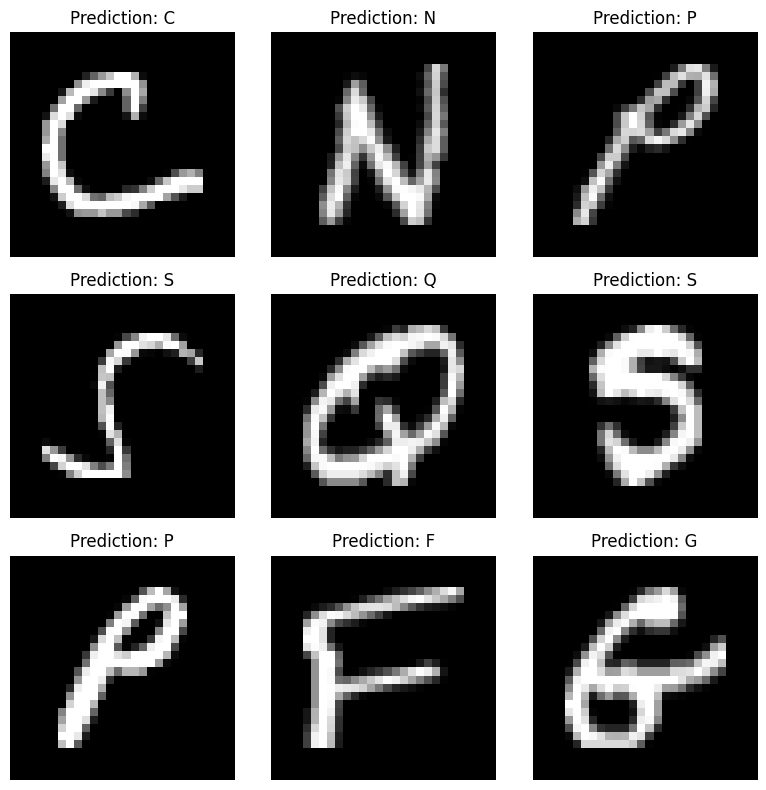

In [313]:
start_idx = 0
end_idx = 290000

num_rows = 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 8))
axes = axes.flatten()

for i in range(num_rows * num_cols):
    
    random_idx = random.randint(start_idx, end_idx) 
    image = np.reshape(X.iloc[random_idx].values, (28, 28))
    
    pred_v = augmented_model.predict(np.array([X_reshaped[random_idx]]))
    predicted_word = letters[np.argmax(pred_v)]
    
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title("Prediction: {}".format(predicted_word))  
    axes[i].axis('off') 

plt.tight_layout()
plt.show()

In [ ]:
augmented_model.save(r'model/model.keras')

In [315]:
image_norm = image / 255.0 

In [316]:
dummy = np.expand_dims(image_norm, axis=2)
dummy.shape

(28, 28, 1)

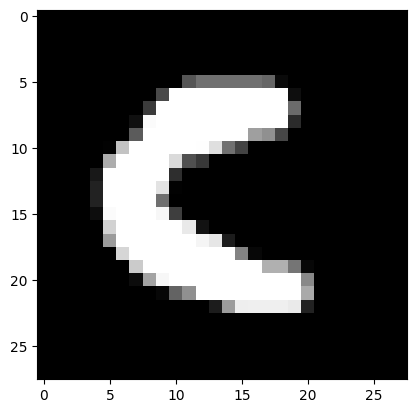

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[6.76123477e-08 2.97938823e-06 9.80978608e-01 9.86243685e-05
  1.00678485e-03 2.98008890e-05 9.34462412e-04 1.88412528e-07
  1.87540735e-07 4.01250611e-04 2.69278535e-04 2.81609269e-03
  2.29026159e-06 9.34920899e-06 2.97389855e-03 2.03908166e-05
  1.69820578e-05 4.40109106e-05 9.45359375e-03 1.09378625e-05
  6.26764668e-04 1.27881867e-06 6.84823078e-08 1.05751546e-07
  1.51006561e-05 2.86880706e-04]] 2

C -> %98.1
S -> %0.95
O -> %0.3

PREDICTION: C


In [327]:
image_path = "sample/c.png" 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))

plt.imshow(image, cmap='gray')
plt.show()

image = image / 255.0
image = np.expand_dims(image, axis=2)

pred_v = augmented_model.predict(np.array([image]))
print(pred_v, np.argmax(pred_v))
print()

top_3 = np.argsort(-pred_v[0])[:3]

for idx in top_3:
    print(f"{letters[idx]} -> %{round(pred_v[0][idx] * 100, 2)}")
print()
predicted_word = letters[np.argmax(pred_v)]
print('\033[1mPREDICTION:\033[0m \033[1m{}\033[0m'.format(predicted_word))

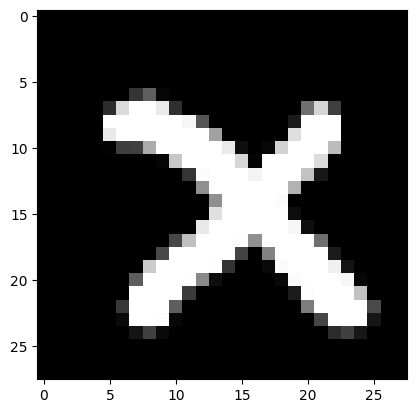

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[7.98752231e-10 2.20336444e-10 5.40174405e-13 5.66796018e-07
  3.02756535e-11 1.61621721e-15 4.89998233e-13 1.72349091e-09
  1.04169728e-10 4.41924364e-08 5.78073494e-04 8.67355425e-07
  2.07614126e-09 3.41830878e-06 1.19302318e-10 4.89282725e-10
  2.02958744e-13 3.24247765e-07 3.05220427e-09 1.21265994e-05
  2.20385008e-08 5.53717142e-12 1.02189007e-10 9.99348938e-01
  5.54656071e-05 1.15378704e-07]] 23

X -> %99.93
K -> %0.06
Y -> %0.01

PREDICTION: X


In [328]:
image_path = "sample/x.png" 
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))

plt.imshow(image, cmap='gray')
plt.show()

image = image / 255.0
image = np.expand_dims(image, axis=2)

pred_v = augmented_model.predict(np.array([image]))
print(pred_v, np.argmax(pred_v))
print()

top_3 = np.argsort(-pred_v[0])[:3]

for idx in top_3:
    print(f"{letters[idx]} -> %{round(pred_v[0][idx] * 100, 2)}")
print()
predicted_word = letters[np.argmax(pred_v)]
print('\033[1mPREDICTION:\033[0m \033[1m{}\033[0m'.format(predicted_word))